**Mateo Aguirre Castrillon** \\
**Alejandro Vargas Orozco** \\
**Ricardo Calderon Garcia**

#MACHINE LEARNING
**El proceso de ajuste de la red neuronal se realiza en las siguientes etapas:**

- Carga de datos: el conjunto de datos de iris se carga desde un archivo CSV utilizando la biblioteca pandas. La función "head()" se utiliza para imprimir los primeros 5 registros de datos y verificar la carga correcta de datos. Luego, los datos se visualizan en un gráfico de dispersión utilizando la biblioteca Seaborn.

- Preparación de datos: los datos se preparan para el modelo eliminando la columna de "especies" y se agrega una columna adicional para el sesgo. Las especies se transforman a números enteros para facilitar la tarea de la red. Además, se establece la semilla del generador de números aleatorios para garantizar la reproducibilidad de los resultados en diferentes ejecuciones del programa.

- Inicialización de parámetros: se inicializan los parámetros del modelo aleatoriamente. En este caso, se inicializa el vector de pesos "theta".

- Entrenamiento del modelo: se entrena el modelo para calcular los valores de los parámetros (pesos) utilizando el algoritmo SGD. Se definen los hiperparámetros de iteración y tasa de aprendizaje. En cada iteración, se calcula el costo utilizando la función de pérdida de error cuadrático medio (MSE) y se actualizan los valores de los pesos utilizando el gradiente descendente.

- Evaluación del modelo: se evalúa la precisión del modelo utilizando la medida de la tasa de aciertos. Finalmente, se representan gráficamente los resultados obtenidos. Se grafica la evolución del costo a lo largo de las iteraciones y se compara la predicción del modelo con los valores reales de las especies de las flores iris en un gráfico de dispersión.

In [ ]:
#Importamos las librerias
import matplotlib.pyplot as plt #Graficos
import seaborn as sns #Visualizacion de datos
from sklearn.datasets import load_iris #Cargar base de datos 
import pandas as pd # Manejo de la base de datos, visualizacion
import numpy as np # Algebra
from sklearn.model_selection import train_test_split # Particion del conjunto de datos(entrenamiento y prueba)
from sklearn import svm #Proporciona herramientas para realizar análisis estadísticos y de aprendizaje automático, incluyendo clasificación, regresión, agrupamiento y reducción de dimensionalidad.

     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa


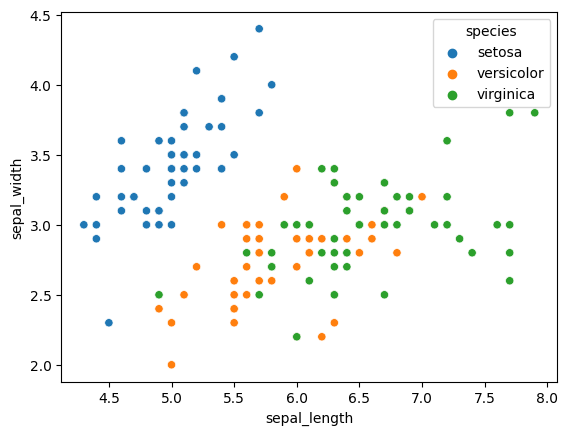

In [ ]:
# Carga los datos de iris desde el archivo CSV
iris_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)#El parámetro header=None se utiliza para indicar que el archivo CSV no contiene encabezados de columna.

# Visualiza los primeros cinco registros de datos
print(iris_data.head())

# Carga los datos de iris desde el archivo CSV
iris_data = sns.load_dataset("iris") # Esta función carga el conjunto de datos iris en un formato de marco de datos (dataframe) de Pandas.

# Crea un gráfico de dispersión para visualizar la distribución de la base de datos en 2 dimensiones
sns.scatterplot(x="sepal_length", y="sepal_width", hue="species", data=iris_data)#El parámetro x se establece en "sepal_length" para mostrar la longitud del sépalo en el eje X,
# y el parámetro y se establece en "sepal_width" para mostrar el ancho del sépalo en el eje Y. El parámetro hue se establece en "species" para separar los puntos por especies de iris. 
#El parámetro data se establece en iris_data para indicar que el gráfico debe utilizar los datos del conjunto de datos iris cargados previamente
plt.show()

In [ ]:
iris_data.head()#muestra los primeros cinco registros de datos del conjunto de datos iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


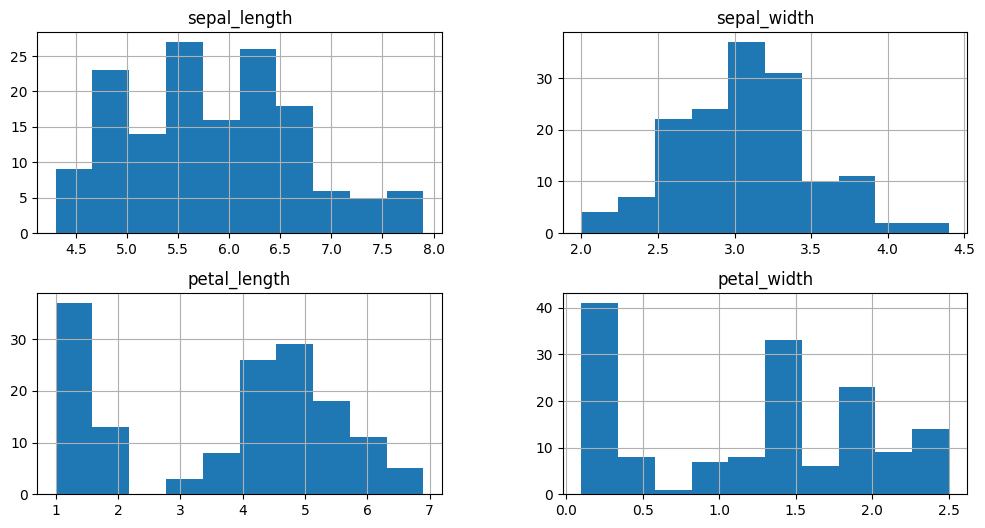

In [ ]:
#Distribucion de las variables
iris_data.hist() #Pandas para crear un histograma para cada columna numérica del conjunto de datos iris
his = plt.gcf() #(get current figure) de Matplotlib para obtener el objeto de figura actual. El objeto de figura se utiliza para modificar las propiedades del gráfico, como su tamaño.
his.set_size_inches(12, 6) #Este comando establece el tamaño de la figura del gráfico en 12 pulgadas de ancho por 6 pulgadas de alto 
plt.show()

In [ ]:
iris_data['species'].value_counts() 
# Aca podemos ver las 3 especies diferentes de flores, por lo tanto esto nos ayudara a definir la salida(Cabe aclarar que esto depende de la tarea)

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [ ]:
iris_data.describe()# se utiliza para mostrar un resumen estadístico de las columnas numéricas de un marco de datos (dataframe

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


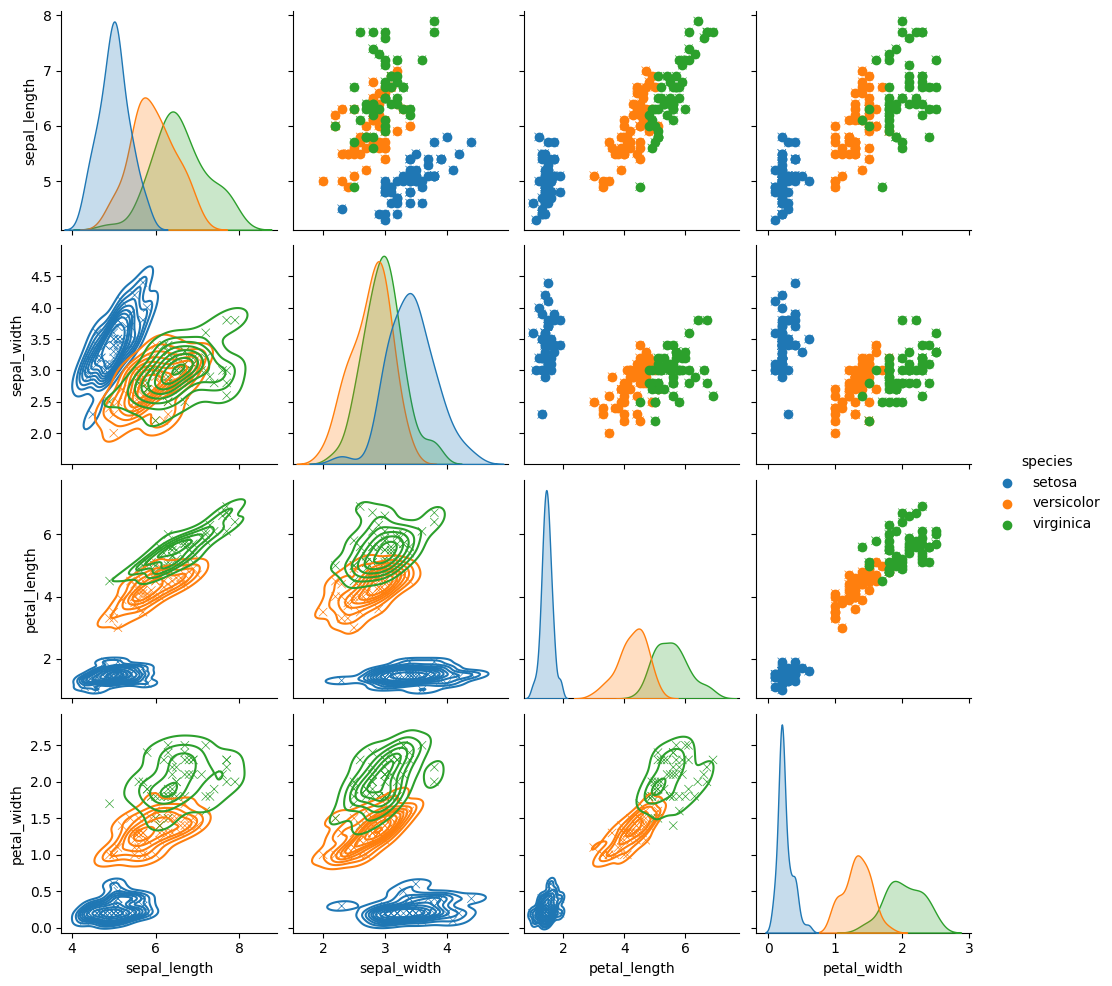

In [ ]:

snsdata = iris_data#se copia el conjunto de datos iris a una nueva variable snsdata que se utilizará para crear los gráficos.
g = sns.pairplot(snsdata, hue='species', markers='x')# la función pairplot de Seaborn para crear una matriz de gráficos de dispersión para cada par de variables numéricas
# en el conjunto de datos snsdata. El parámetro hue='species' se utiliza para colorear los puntos en función de la especie de iris correspondiente. El parámetro markers='x' 
#se utiliza para representar cada especie con un símbolo diferente. 
g = g.map_upper(plt.scatter)#crea un gráfico de dispersión para cada par de variables numéricas en la parte superior de la matriz.
g = g.map_lower(sns.kdeplot)# crea un gráfico de densidad kernel para cada par de variables numéricas en la parte inferior de la matriz.

In [ ]:
rows, col = iris_data.shape #obtener el número de filas y columnas del conjunto de datos
print("Rows : %s, column : %s" % (rows, col))

Rows : 150, column : 5


In [ ]:
mapping = { # que se utilizará para convertir las etiquetas de clase categóricas en números enteros. Cada clave del diccionario es una etiqueta de clase y           
    'setosa' : 1,#  cada valor asociado a esa clave es el número entero correspondiente
    'versicolor' : 2,
    'virginica' : 3
}

X = iris_data.drop(['species'], axis=1).values # Valores de características de entrada
#La función drop  se utiliza para eliminar la columna 'species' del conjunto de datos iris_data, y el método values se utiliza para convertir el resultado en un arreglo
'''SACAMOS ESPECIES YA QUE ES UNA VARIABLE CATEGORICA Y ADEMAS ES UNA DE LAS TAREAS DEL MODELO POR LO TANTO DEBE IR EN LA VARIABLE DE SALIDA EN ESTE CASO Y '''

y = iris_data.species.replace(mapping).values.reshape(rows,1) # Valores de salida
#Se utiliza el método replace de Pandas para convertir las etiquetas de clase categóricas en números enteros utilizando el diccionario mapping,
# y luego el método values se utiliza para convertir el resultado en un arreglo NumPy. La función reshape se utiliza para darle a y la forma de una matriz de una columna.
X = np.hstack(((np.ones((rows,1))), X))# Agregar una columna más para el sesgo
#se crea un arreglo NumPy de forma (rows, 1) que contiene solo 1 usando la función ones de NumPy. Luego, se utiliza la función hstack de NumPy 
#para concatenar este arreglo NumPy con la matriz X. El resultado es una matriz X que tiene una columna adicional al principio que consiste solo en 1.


In [ ]:
np.random.seed(0) # Pongamos el cero por el momento
'''Al establecer la semilla del generador de números aleatorios en 0, 
 el programa reproducirá la misma secuencia de números aleatorios cada vez que se ejecute,
 lo que puede ser útil para fines de depuración y para garantizar la reproducibilidad de 
 los resultados en diferentes ejecuciones del programa.
 ¡El vector de pesos es un conjunto de parámetros ajustables que se utilizan para ajustar un modelo a un conjunto de datos y minimizar la función de costo.
 En este caso nuestro vector de pesos es theta!'''
theta = np.random.randn(1,5) # Establecer valores de theta aleatoriamente
#theta Es una matriz aleatoria de dimensiones 1 fila que llevara los valores de los pesos,5 columnas ya que la base de datos iris presenta 5 variables.

print("Theta : %s" % (theta))

Theta : [[1.76405235 0.40015721 0.97873798 2.2408932  1.86755799]]


**Funcion de perdida:**
La función de pérdida es una medida de qué tan bien está funcionando la red neuronal en el conjunto de datos de entrenamiento y su objetivo es minimizar la pérdida.
$$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y}_i)^2$$
Donde $n$ es el número de observaciones, $y_i$ es el valor real de la variable dependiente y $\hat{y}_i$ es el valor predicho por el modelo. \\\\


**Se entrena el modelo para calcular los valores de los parámetros (pesos) utilizando el algoritmo SGD:**  el objetivo del algoritmo es minimizar la función de pérdida, que mide la diferencia entre las salidas reales de la red y las salidas deseadas.
$$ \theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} $$
SGD es una técnica de optimización utilizada para actualizar los parámetros del modelo en cada iteración del entrenamiento, lo que permite que el modelo aprenda a partir de los datos de entrenamiento de manera más eficiente y con menos requisitos de memoria que si se utiliza todo el conjunto de datos de entrenamiento en cada iteración


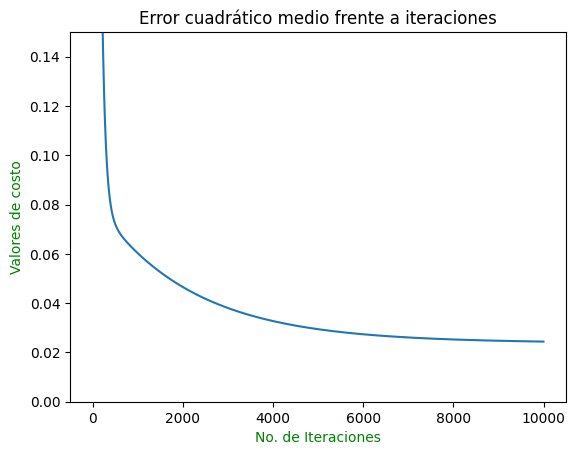

In [ ]:
#  Entrenemos nuestro modelo para calcular valores de theta(pesos)
iteration = 10000
learning_rate = 0.003 # Si va por fórmula, esto es en realidad alfa
J = np.zeros(iteration) # 1 x 10000 maxtix

for i in range(iteration):
    J[i] = (1/(2 * rows) * np.sum((np.dot(X, theta.T) - y) ** 2 ))
    '''J[i] = (1/(2 * rows) * np.sum((np.dot(X, theta.T) - y) ** 2 ))

    Donde J[i] representa el valor del costo para la iteración i, 
    rows representa el número de muestras en el conjunto de datos,
    X representa la matriz de características de entrada, 
    theta representa los parámetros del modelo y y representa los valores de salida. 
    La función de pérdida de error cuadrático medio (MSE) 
    se calcula como la mitad de la suma de los cuadrados de las diferencias entre las predicciones y los valores reales.'''
    theta -= ((learning_rate/rows) * np.dot((np.dot(X, theta.T) - y).reshape(1,rows), X))
    ''' La actualización se realiza en cada iteración utilizando solo una muestra aleatoria (SDG) en lugar de todo el conjunto de datos (batch).'''


prediction = np.round(np.dot(X, theta.T))

ax = plt.subplot(111)
ax.plot(np.arange(iteration), J)
ax.set_ylim([0,0.15])
plt.ylabel("Valores de costo", color="Green")
plt.xlabel("No. de Iteraciones", color="Green")
plt.title("Error cuadrático medio frente a iteraciones")
plt.show()

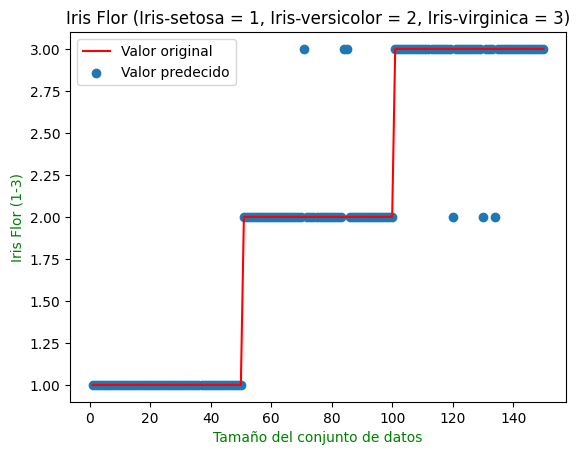

In [ ]:
ax = plt.subplot(111)

ax.plot(np.arange(1, 151, 1), y, label='Valor original', color='red')
ax.scatter(np.arange(1, 151, 1), prediction, label='Valor predecido')

plt.xlabel("Tamaño del conjunto de datos", color="Green")
plt.ylabel("Iris Flor (1-3)", color="Green")
plt.title("Iris Flor (Iris-setosa = 1, Iris-versicolor = 2, Iris-virginica = 3)")

ax.legend()
plt.show()

In [ ]:
accuracy = (sum(prediction == y)/float(len(y)) * 100)[0]
print("El modeló predijo los valores del conjunto de datos de Iris con una precisión general de %ss" % (accuracy))

El modeló predijo los valores del conjunto de datos de Iris con una precisión general de 96.0s


# PRUEBA DEL MODELO ML

In [ ]:
# Separa los datos de características (X) y la variable objetivo (y)
X = iris_data.iloc[:, :-1] #iloc[:, :-1] se utiliza para seleccionar todas las filas y todas las columnas, excepto la última columna, que es la columna que contiene la variable objetivo (especie).
y = iris_data.species.replace(mapping).values.reshape(rows,1) # Valores de salida con los datos codificados

# Crea una instancia de la clase SVM
clf = svm.SVC(kernel='linear')

# Entrena el modelo con los datos de entrenamiento
clf.fit(X, y)

# Ahora puedes hacer predicciones sobre nuevos datos utilizando el método predict del modelo entrenado
nuevos_datos = [[5.1,	3.4,	1.5,	0.2]]
prediccion = clf.predict(nuevos_datos)

if prediccion == 1:
    print("La flor es de tipo setosa")
elif prediccion == 2:
    print("La flor es de tipo versicolor")
else:
    print("La flor es de tipo virginica")



La flor es de tipo setosa


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


#DEEP LEARNING DATABASE IRIS KERAS



In [ ]:
#Importamos librerias
from keras.models import Sequential#es una clase que permite crear modelos de redes neuronales secuenciales.
from keras.layers import Dense#es una capa de red neuronal completamente conectada.
from keras.wrappers.scikit_learn import KerasClassifier#es una clase que permite utilizar modelos de Keras como clasificadores en el proceso de validación cruzada.
from keras.wrappers.scikit_learn import KerasRegressor
from keras.utils import np_utils#es una biblioteca de utilidades de Keras que ayuda a trabajar con datos numéricos.
from sklearn.model_selection import cross_val_score#es una función de Scikit-learn que calcula la precisión de un modelo mediante validación cruzada.
from sklearn.model_selection import KFold#es una clase de Scikit-learn que divide el conjunto de datos en subconjuntos para realizar validación cruzada.
from sklearn.preprocessing import LabelEncoder#es una clase de Scikit-learn que codifica etiquetas de texto en valores numéricos.
from sklearn.pipeline import Pipeline# es una clase de Scikit-learn que permite crear flujos de trabajo de preprocesamiento y modelado para los datos.
from sklearn.preprocessing import StandardScaler

**Definimos la arquitectura de la red**

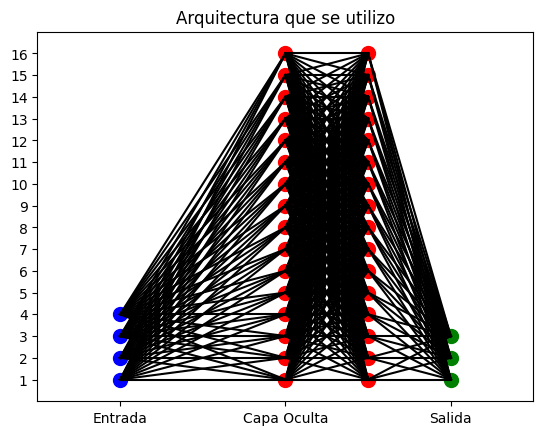

In [ ]:
# Definir la arquitectura de la red neuronal
input_layer = 4 #Dado que la base de datos presenta 4 variables de nuestro interes
hidden_layer = 16 # Proceso iterativo 
output_layer = 3 # Dado que nos interesa identificar entre las 3 especies de flores diferentes

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Agregar las capas a la gráfica
ax.scatter([0.5]*input_layer, range(input_layer), color='b', s=100)
ax.scatter([1.5]*hidden_layer, range(hidden_layer), color='r', s=100)
ax.scatter([2.0]*hidden_layer, range(hidden_layer), color='r', s=100)   #En estas líneas se agregan las capas a la gráfica, utilizando la función scatter de matplotlib. Se dibujan círculos para 
ax.scatter([2.5]*output_layer, range(output_layer), color='g', s=100)   #cada uno de los nodos de la red neuronal, y se les asigna un color diferente para distinguir las capas de entrada, oculta y de salida.

# Agregar las conexiones entre las capas
for i in range(input_layer):
    for j in range(hidden_layer):
        ax.plot([0.5,1.5],[i,j], '-', color='k')   #En estas líneas se agregan las conexiones entre las capas de la red neuronal. Para ello, 
for i in range(hidden_layer):                      #se utilizan ciclos for para recorrer los nodos de cada capa y se dibujan las conexiones con la función plot de matplotlib.
    for j in range(hidden_layer):
        ax.plot([1.5,2.0],[i,j], '-', color='k')
for i in range(hidden_layer):
    for j in range(output_layer):
        ax.plot([2.0,2.5],[i,j], '-', color='k')

# Configurar el aspecto de la gráfica
ax.set_xlim(0,3)
ax.set_ylim(-1,max(input_layer, hidden_layer, output_layer))
ax.set_xticks([0.5,1.5,2.5])
ax.set_xticklabels(['Entrada','Capa Oculta','Salida'])
ax.set_yticks(range(max(input_layer, hidden_layer, output_layer)))          #Finalmente, en estas líneas se configura el aspecto de la gráfica y se muestra. Se establecen los límites para los ejes x e y, 
ax.set_yticklabels(range(1,max(input_layer, hidden_layer, output_layer)+1)) #se establecen las etiquetas para los ticks de los ejes x e y, se asigna un título a la
ax.set_title('Arquitectura que se utilizo')

# Mostrar la gráfica
plt.show()


Varianza:
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
target               0.671141
dtype: float64

Desviación estándar:
sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
target               0.819232
dtype: float64


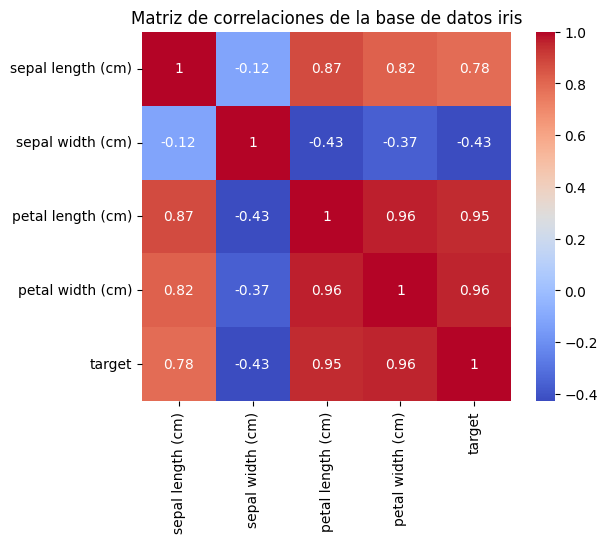

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar la base de datos iris
iris = load_iris()

# Crear un dataframe con los datos de iris
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

# Obtener la varianza
variance = df.var()

# Obtener la desviación estándar
std_deviation = df.std()

# Obtener la matriz de correlaciones
corr_matrix = df.corr()

# Imprimir los resultados
print("Varianza:")
print(variance)
print("\nDesviación estándar:")
print(std_deviation)

# Crear el mapa de calor
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)

# Agregar título al mapa de calor
plt.title('Matriz de correlaciones de la base de datos iris')

# Mostrar el mapa de calor
plt.show()


In [ ]:
i = iris_data     #se está preprocesando la columna 'species' del conjunto de datos 'iris_data' para convertir los nombres de las especies en números enteros, 
iris = i.values   #utilizando el diccionario de mapeo previamente definido. Luego, se toman los valores de la columna 'species' ya transformados y se almacenan en un arreglo de numpy llamado 'y'.

y = iris_data.species.replace(mapping).values.reshape(rows,1) # Valores de salida La función 'reshape' se utiliza para asegurar que 'y' tenga la forma de una matriz de una sola columna con la misma cantidad de filas que la matriz 'iris' }
#(es decir, una matriz de (150,1)), para poder utilizarlo como salida en la red neurona

In [ ]:
X = iris[0:, 0:4].astype(float) #extrae los primeros cuatro atributos (longitud del sépalo, ancho del sépalo, longitud del pétalo, ancho del pétalo)
Y = iris[0:, 4] #extrae la columna 4 de la matriz de datos iris, que contiene las especies de las flores. Estos valores se asignan a la variable Y. 
#El índice 0: indica que se incluirán todas las filas de la matriz iris, y 4 indica que se seleccionará la columna 4

In [ ]:
# ESTABLECER SEMILLA PARA LA REPODUCIBILIDAD DE LOS DATOS
'''En este caso, el código establece la semilla en 64 utilizando la función seed de NumPy.
Esto significa que cada vez que se generen números aleatorios con NumPy en este código,
se utilizará la misma secuencia de números aleatorios.'''
seed = 64
np.random.seed(seed)

In [ ]:
# CODIFICACION CLASE ESPECIES
encoder = LabelEncoder()  #Encoder de scikit-learn y se ajusta a los valores de la variable Y que contienen los nombres de las especies de las flores.  
encoder.fit(Y)  #se transforman los valores categóricos de Y a valores enteros.
encoded_Y = encoder.transform(Y)


# One Hot Encode
y_dummy = np_utils.to_categorical(encoded_Y) # se convierten los valores enteros en un vector binario para que el algoritmo de aprendizaje pueda entenderlos. 
#Se utiliza la función to_categorical de keras.utils para convertir los valores enteros de la variable codificada en un vector binario.

In [ ]:
#Función de aprendizaje profundo
def deepml_model():
    # Creacion del modelo
    deepml = Sequential()   #define la arquitectura de una red neuronal profunda para clasificar las tres especies de flores de iris.
    # La arquitectura tiene dos capas ocultas de 16 neuronas cada una y una capa de salida de tres neuronas, una para cada especie de flor.
    deepml.add(Dense(16, input_dim=4, activation='softmax'))#La primera capa oculta utiliza la función de activación "relu" y recibe entradas de cuatro variables que son las características de la flor. 
    deepml.add(Dense(16, activation='softmax'))# La segunda capa oculta y la capa de salida utilizan la función de activación "softmax"
    deepml.add(Dense(3, activation='softmax'))
    '''En Keras, la función de activación para regresión logística multinomial se llama "softmax". 
    Puedes usarla en la última capa de tu modelo para obtener una salida que represente la probabilidad de cada clase.
    La función softmax es una generalización de la función sigmoide a más de dos clases.'''
    # Compilacion del modelo
    deepml.compile(loss='mse', optimizer='adam', metrics=['accuracy']) #se utiliza para clasificación multiclase y el optimizador "adam".
    return deepml

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Separar datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_dummy, test_size=0.2, random_state=42)

In [ ]:
estimate = KerasClassifier(build_fn=deepml_model, epochs=500, batch_size=30, verbose=0)#se utiliza para estimar el modelo de aprendizaje profundo definido por la función

<ipython-input-47-dd0982c492f0>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimate = KerasClassifier(build_fn=deepml_model, epochs=500, batch_size=30, verbose=0)#se utiliza para estimar el modelo de aprendizaje profundo definido por la función


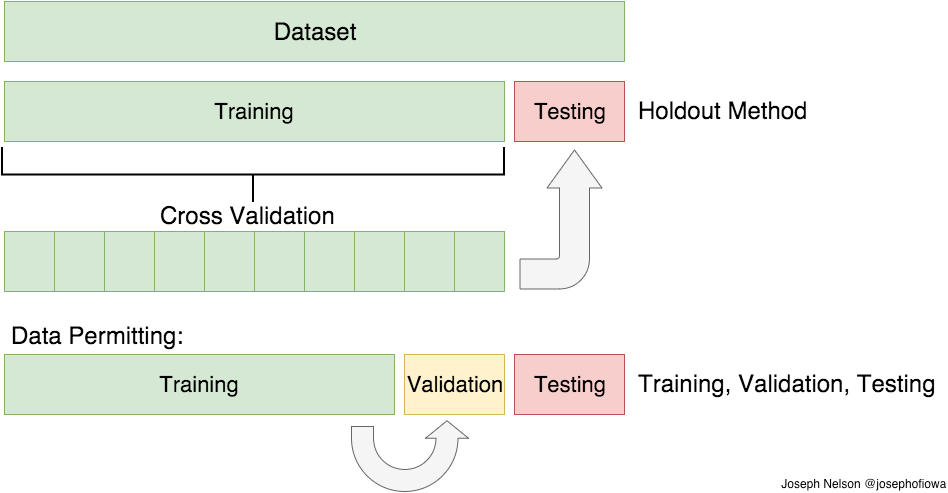
)

In [ ]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=seed)#se utiliza para realizar validación cruzada. n_splits indica el número de divisiones que se realizan en los datos.
# En este caso, se han elegido 10 divisiones. shuffle indica si los datos se mezclan antes de dividirlos. En este caso, se ha elegido True, por lo que los datos se mezclarán antes de la división.
# random_state es una semilla aleatoria que se utiliza para garantizar que las divisiones sean las mismas en cada ejecución del modelo.


In [ ]:
results = cross_val_score(estimate, X, y_dummy, cv=k_fold)#se aplica la técnica de validación cruzada utilizando la función
print("Model: %.2f%% desviacion estandar: %.2f%%" % (results.mean()*100, results.std()*100))
print(results)



Model: 95.33% desviacion estandar: 4.27%
[0.93333334 1.         0.93333334 1.         0.93333334 0.86666667
 0.93333334 1.         1.         0.93333334]


**PRUEBA DEL MODELO EN DATOS NUEVOS**

In [ ]:
scaler = StandardScaler()
# Cargar el modelo entrenado
model = deepml_model()
# se está realizando la normalización de los datos utilizando el objeto StandardScaler de la librería sklearn.preprocessing.
# Luego se define el modelo de red neuronal llamando a la función deepml_model(), 
#la cual crea un modelo secuencial de keras con una capa de entrada, dos capas ocultas y una capa de salida.

#Después se entrena el modelo con los datos normalizados utilizando la función fit()
'''
ycodified = iris_data.species.replace(mapping).values.reshape(rows,1) # Valores de salida
columnas_de_unos = np.ones((ycodified.shape[0], 2)) #zeros concatenate
ycod = np.concatenate((ycodified, columnas_de_unos), axis=1)# m,atrix'''

# Entrenar el modelo
history = model.fit(X, y_dummy, epochs=500, batch_size=30, verbose=0)
'''la función .fit() es una herramienta esencial para entrenar modelos de red neuronal en Keras,
 ya que automatiza todo el proceso de propagación hacia adelante y hacia atrás,
  así como la optimización de los pesos de la red para ajustar el modelo a los datos de entrenamiento.
'''

#Es importante tener en cuenta que no se está realizando validación cruzada en esta parte del código, ya que se está entrenando el modelo completo con todos los datos disponibles.

'la función .fit() es una herramienta esencial para entrenar modelos de red neuronal en Keras,\n ya que automatiza todo el proceso de propagación hacia adelante y hacia atrás,\n  así como la optimización de los pesos de la red para ajustar el modelo a los datos de entrenamiento.\n'

In [ ]:
# Datos de entrada para la predicción
new_data = [[6.4,	2.8,	5.6,	2.1]]  # Ejemplo de datos de entrada,se cargan los datos y se preparan para ser utilizados en el modelo.

X_scaled = scaler.fit_transform(X) #se entrena el modelo con los datos de entrada y salida preprocesados y se guarda en una variable
# Preprocesamiento de los datos de entrada
new_data1 = scaler.transform(new_data)

prediction = model.predict(new_data1)

# Decodificar la sali
predicted_species_index=np.argmax(prediction, axis=None)

# Obtener la especie correspondiente al índice
predicted_species = encoder.inverse_transform([predicted_species_index]) #se utiliza el modelo entrenado para hacer una predicción de la especie de una flor iris a partir de unos datos de entrada nuevos y se imprime la especie predicha.

# Imprimir la especie predicha
print("La especie predicha es:", predicted_species)

1/1 [==============================] - 0s 63ms/step
La especie predicha es: ['virginica']


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar la base de datos iris
iris = load_iris()

# Preprocesamiento de datos
X = iris.data
y = iris.target
y = to_categorical(y)

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Separar datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=64)

model = deepml_model()

# Entrenar modelo
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

# Evaluar modelo en datos de prueba
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f' % (accuracy*100),'%')

# Datos de entrada para la predicción
new_data = [[4.4,	1.8,3.6,	1.1]]  # Ejemplo de datos de entrada,se cargan los datos y se preparan para ser utilizados en el modelo.

# Preprocesamiento de los datos de entrada
new_data1 = scaler.transform(new_data)

prediction = model.predict(new_data1)

# Decodificar la sali
predicted_species_index=np.argmax(prediction, axis=None)

# Obtener la especie correspondiente al índice
predicted_species = encoder.inverse_transform([predicted_species_index]) #se utiliza el modelo entrenado para hacer una predicción de la especie de una flor iris a partir de unos datos de entrada nuevos y se imprime la especie predicha.

# Imprimir la especie predicha
print("La especie predicha es:", predicted_species)

Accuracy: 80.00 %
1/1 [==============================] - 0s 62ms/step
La especie predicha es: ['versicolor']


In [ ]:
from sklearn.metrics import r2_score
y_prediction = model.predict(X)

# Calcular el R^2 de la red neuronal
r2 = r2_score(y_dummy, y_prediction)
print("El coeficiente de determinación (R^2) de la red neuronal es:", r2)


5/5 [==============================] - 0s 2ms/step
El coeficiente de determinación (R^2) de la red neuronal es: 0.5711273032633098


In [ ]:
prediction

array([[0.18445289, 0.5422728 , 0.27327427]], dtype=float32)

#DEEP LEARNIG DATABASE IRIS(NO USING KERAS)

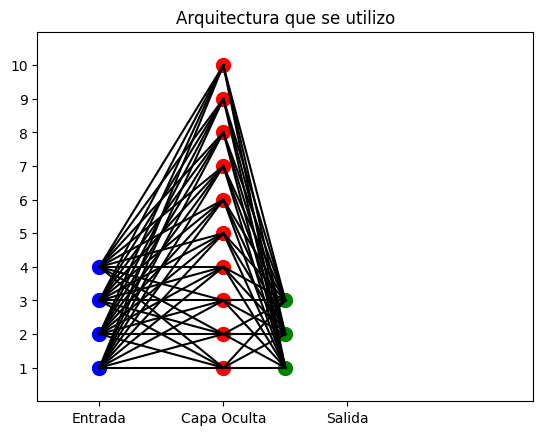

In [ ]:
# Definir la arquitectura de la red neuronal
input_layer = 4 #Dado que la base de datos presenta 4 variables de nuestro interes
hidden_layer = 10 # Proceso iterativo 
output_layer = 3 # Dado que nos interesa identificar entre las 3 especies de flores diferentes
# definen las dimensiones de las capas de entrada, oculta y salida de la red neuronal. 


# Crear la figura y los ejes
fig, ax = plt.subplots()#se crea una figura y unos ejes para la gráfica donde se representará la arquitectura.

# Agregar las capas a la gráfica
ax.scatter([0.5]*input_layer, range(input_layer), color='b', s=100)
ax.scatter([1.5]*hidden_layer, range(hidden_layer), color='r', s=100) #se agregan los nodos de cada capa a la gráfica, utilizando círculos de diferentes colores para diferenciar cada capa
ax.scatter([2.0]*output_layer, range(output_layer), color='g', s=100)

# Agregar las conexiones entre las capas
for i in range(input_layer):
    for j in range(hidden_layer):
        ax.plot([0.5,1.5],[i,j], '-', color='k')
for i in range(hidden_layer):        #e agregan las conexiones entre los nodos de las capas con líneas rectas, para representar cómo fluye la información a través de la red neurona
    for j in range(output_layer): 
        ax.plot([1.5,2.0],[i,j], '-', color='k')

"ax.set() es un método que se utiliza para establecer varias propiedades de la figura, los ejes y los elementos dentro de los ejes."

# Configurar el aspecto de la gráfica
ax.set_xlim(0,4) #establece los límites del eje x de la gráfica en el rango de 0 a 4.
ax.set_ylim(-1,max(input_layer, hidden_layer, output_layer))
ax.set_xticks([0.5,1.5,2.5])
ax.set_xticklabels(['Entrada','Capa Oculta','Salida'])     #se configura la apariencia de la gráfica y se muestran las etiquetas de las capas en el eje x, y las etiquetas numéricas de los nodos en el eje y.
ax.set_yticks(range(max(input_layer, hidden_layer, output_layer)))
ax.set_yticklabels(range(1,max(input_layer, hidden_layer, output_layer)+1))
ax.set_title('Arquitectura que se utilizo')

# Mostrar la gráfica
plt.show()

**FUCNCIONES DE ACTIVACION USAREMOS ReLU y softmax**

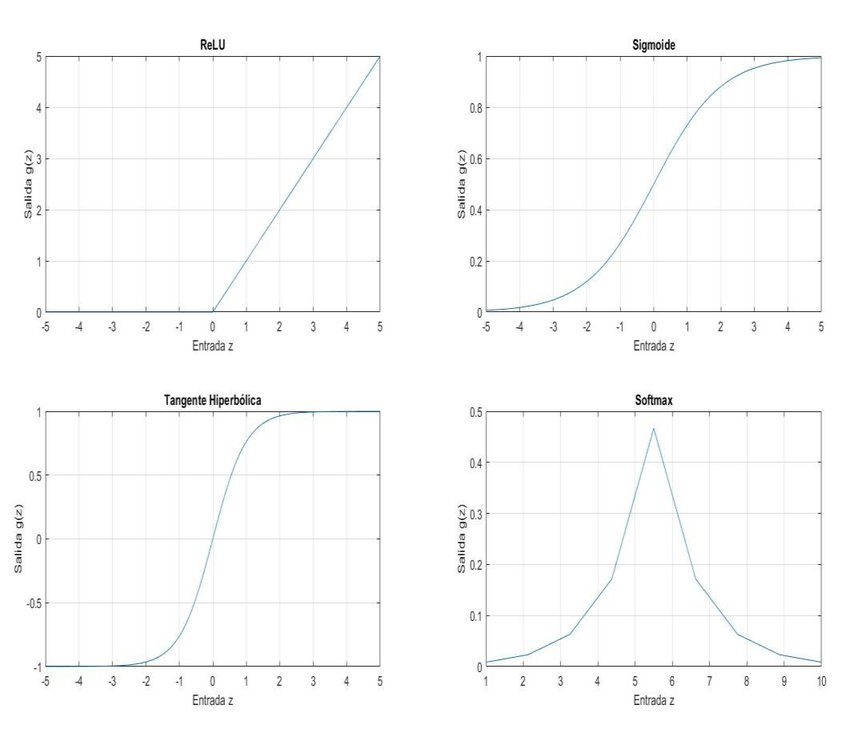

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Funciones de activación
def relu(x):
    return np.maximum(0, x)
#Lo usamos debido a que nuestro objetivo es la clasificacion de especies
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True)) # Evitar posibles problemas de estabilidad numérica
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)
    
# Función de pérdida
#ERROR CUADRATICO MEDIO
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)           #Se define algunas funciones, como la función de activación ReLU, la función de pérdida MSE, la función de normalización L2 y la función softmax.
#Error Absoluto Medio
def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Función de normalización L2
def l2_normalize(X, epsilon=1e-12):
    norm = np.sqrt(np.sum(X**2, axis=1, keepdims=True))
    '''
    La regularización L2 ayuda a reducir la complejidad del modelo,
    lo que puede mejorar su capacidad para generalizar a datos nuevos que no se vieron durante el entrenamiento.
    Además, puede ayudar a evitar la inestabilidad numérica en el proceso de entrenamiento de la red.
    escalar los datos para que tengan una media de cero y una varianza unitaria. '''
    return X / (norm + epsilon)
#
# Carga de datos
iris = load_iris()
X = iris.data
#Otro tipo de codificacion
y = iris.target #VECTOR

# Transformación de etiquetas a one-hot encoding
y_encoded = np.eye(3)[y]#matriz

# Normalización de los datos
X_normalized = l2_normalize(X)

# Separación de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_encoded, test_size=0.3, random_state=64)

# Definición de la arquitectura de la red
input_dim = X_train.shape[1]
hidden_dim = 10
output_dim = y_train.shape[1]

# Inicialización de los parámetros de la red
'''W1 y W2 son los pesos de las capas oculta y de salida, respectivamente,
mientras que b1 y b2 son los sesgos de las capas oculta y de salida,
respectivamente. Los pesos (W1 y W2) son matrices que se utilizan para ponderar las entradas en las capas oculta y de salida,
mientras que los sesgos (b1 y b2) son vectores que se utilizan para ajustar el umbral de activación de las neuronas en las capas oculta y de salida.'''

W1 = np.random.randn(input_dim, hidden_dim) * np.sqrt(2 / input_dim)
b1 = np.zeros((1, hidden_dim))
W2 = np.random.randn(hidden_dim, output_dim) * np.sqrt(2 / hidden_dim)
b2 = np.zeros((1, output_dim))
'''np.random.randn(input_dim, hidden_dim) genera una matriz de dimensiones (input_dim, hidden_dim) 
con valores aleatorios tomados de una distribución normal estándar (media 0 y desviación estándar 1).
np.sqrt(2 / input_dim) calcula la raíz cuadrada de 2 dividido por la raíz cuadrada del número de entradas en la capa,
lo cual es una heurística común para inicializar los pesos de una red neuronal
y se conoce como "inicialización de He".
'''
# Hiperparámetros de la red
learning_rate = 0.03
epochs = 1000

# Entrenamiento de la red
for epoch in range(epochs):

    # Propagación hacia adelante
    hidden_layer = relu(np.dot(X_train, W1) + b1)
    y_pred = softmax(np.dot(hidden_layer, W2) + b2)


    # Propagacion hacia atras
    # Cálculo del error en la capa de salida
    error_output = y_pred - y_train
    dW2 = np.dot(hidden_layer.T, error_output * y_pred * (1 - y_pred))
    db2 = np.sum(error_output * y_pred * (1 - y_pred), axis=0, keepdims=True)

    # Cálculo del error en la capa oculta
    error_hidden = np.dot(error_output * y_pred * (1 - y_pred), W2.T) * np.where(hidden_layer > 0, 1, 0)
    dW1 = np.dot(X_train.T, error_hidden)
    db1 = np.sum(error_hidden, axis=0, keepdims=True)

    # Actualización de los parámetros
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

    # Cálculo de la función de pérdida y la precisión
    loss = mse(y_train, y_pred)
    accuracy = np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_train, axis=1))
    if epoch % 100 == 0:
        print(f'Epoch {epoch} - Loss: {loss:.4f} - Accuracy: {accuracy}')


Epoch 0 - Loss: 0.2482 - Accuracy: 0.34285714285714286
Epoch 100 - Loss: 0.0947 - Accuracy: 0.7238095238095238
Epoch 200 - Loss: 0.0900 - Accuracy: 0.7238095238095238
Epoch 300 - Loss: 0.0765 - Accuracy: 0.7904761904761904
Epoch 400 - Loss: 0.0568 - Accuracy: 0.8476190476190476
Epoch 500 - Loss: 0.0363 - Accuracy: 0.9047619047619048
Epoch 600 - Loss: 0.0253 - Accuracy: 0.9428571428571428
Epoch 700 - Loss: 0.0201 - Accuracy: 0.9523809523809523
Epoch 800 - Loss: 0.0171 - Accuracy: 0.9619047619047619
Epoch 900 - Loss: 0.0151 - Accuracy: 0.9619047619047619


In [ ]:
print('Precision de la red:',accuracy*100,'%')
print()
print('Perdida de la red:',loss*100,'%')

Precision de la red: 98.09523809523809 %

Perdida de la red: 1.1516345849477736 %


In [ ]:
y_prediction_no_keras = y_pred

# Calcular el R^2 de la red neuronal
r2NK = r2_score(y_train, y_prediction_no_keras)
print("El coeficiente de determinación (R^2) de la red neuronal es:", r2NK)

El coeficiente de determinación (R^2) de la red neuronal es: 0.9473807288678472


**PRUEBA DEL MODELO**

In [ ]:
# Solicitar al usuario que ingrese los datos para la predicción
sepal_length = float(input("Ingrese el largo del sépalo: "))
sepal_width = float(input("Ingrese el ancho del sépalo: "))
petal_length = float(input("Ingrese el largo del pétalo: "))
petal_width = float(input("Ingrese el ancho del pétalo: "))

# Normalizar los datos ingresados
X_pred = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
X_pred_normalized = l2_normalize(X_pred)

# Realizar la propagación hacia adelante
hidden_layer_pred = relu(np.dot(X_pred_normalized, W1) + b1)
y_pred = softmax(np.dot(hidden_layer_pred, W2) + b2)

# Imprimir la salida estimada
species = np.argmax(y_pred, axis=None)
if species==0:
  print(f'La especie de la flor es: {species}, es decir Setosa')
elif species==1:
  print(f'La especie de la flor es: {species}, es decir Versicolor')
else:
  print(f'La especie de la flor es: {species},es decir Virginica')


Ingrese el largo del sépalo: 6.7
Ingrese el ancho del sépalo: 3.2
Ingrese el largo del pétalo: 1.1
Ingrese el ancho del pétalo: .01
La especie de la flor es: 0, es decir Setosa


In [ ]:
y_pred

array([[9.94715614e-01, 5.28438572e-03, 3.34685622e-18]])

[BIBLIOGRAFIA](https://topbigdata.es/como-elegir-una-funcion-de-activacion-para-el-aprendizaje-profundo/#:~:text=C%C3%B3mo%20elegir%20una%20funci%C3%B3n%20de%20activaci%C3%B3n%20de%20salida,de%20variable%20que%20se%20predice)